# CUSTOMER CHURN PREDICTION FOR A TELCOM COMPANY

# Task 1: Data preparation

In [136]:
#used to filter out all  the warnings
import warnings
warnings.filterwarnings('ignore')

In [137]:
#load the dataset
import pandas as pd,numpy as np
df=pd.read_csv(r"/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [138]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [139]:
#used to display the columns in the dataset
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [140]:
#displays the number of rows and columns in the dataset
df.shape

(7043, 21)

In [141]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [143]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [144]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [145]:
#used to display the total numbers of rows that have missing values(null values) in each column
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [146]:
#convert the totalcharges to a numeric value we use the errors parameters to coerce to prevent errors
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [147]:
#look for the total sum of the missing total charrges
df['TotalCharges'].isnull().sum()

11

In [148]:
#this is used to select the rows where the monthlycharge is null after conversion to integer and select the tenure and monthly charge column
df.loc[df['TotalCharges'].isnull(),['MonthlyCharges','tenure']]

,MonthlyCharges,tenure
488,52.55,0
753,20.25,0
936,80.85,0
1082,25.75,0
1340,56.05,0
3331,19.85,0
3826,25.35,0
4380,20.00,0
5218,19.70,0
6670,73.35,0


In [149]:
#totalcharge=monthlycharge * tenure
empty_charge=df['TotalCharges'].isnull()
df.loc[empty_charge,'TotalCharges']=df.loc[empty_charge,'MonthlyCharges']*df.loc[empty_charge,'tenure']

In [150]:
#to confirm if there are null values
df['TotalCharges'].isnull().sum()

0

In [151]:
#  Drop customerID 
df.drop(columns=['customerID'], inplace=True)


In [152]:
#check for duplicates-we first drop the customerID because it makes every row unique
df.duplicated().sum()

22

In [153]:
#you can either use mapping or a Label encoder
#df['Churn']=df['Churn'].map({'Yes':1,'No':0})
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Churn']=le.fit_transform(df['Churn'])

In [154]:
df['Churn'].value_counts()


Churn
0    5174
1    1869
Name: count, dtype: int64

In [155]:
#Seperate the columns according to the datatype
num_cols=df.select_dtypes(include=['float64','int64']).columns.tolist()
category_cols=df.select_dtypes(include=['object']).columns.tolist()

## Task 2: Exploratory Data Analysis (EDA) 

In [156]:
#Visualize churn distribution. 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

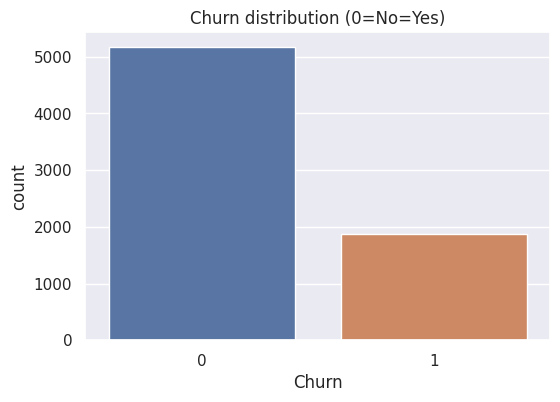

In [157]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn',data=df)
plt.title('Churn distribution (0=No=Yes)')
plt.show()

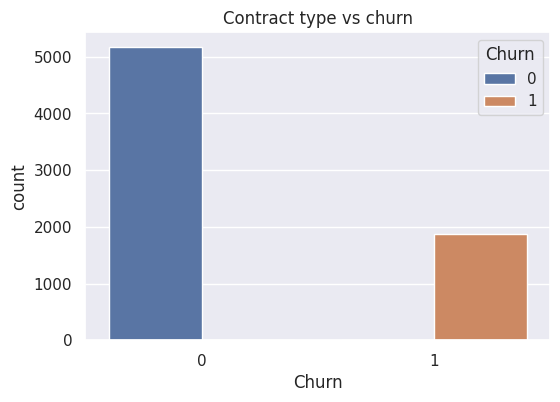

In [158]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn',hue="Churn",data=df)#the hue is used to add color to the yes or no in the churn variable
plt.title("Contract type vs churn")
plt.show()

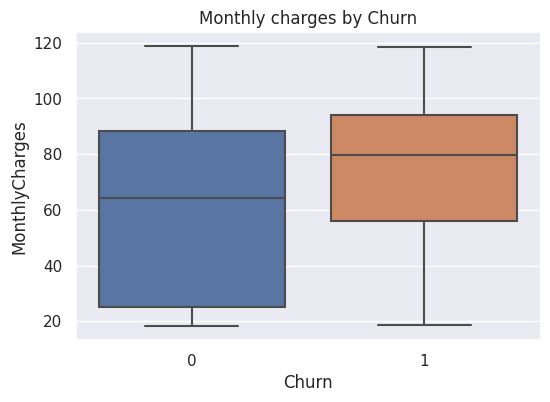

In [159]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Churn",y="MonthlyCharges",data=df)
plt.title("Monthly charges by Churn")
plt.show()

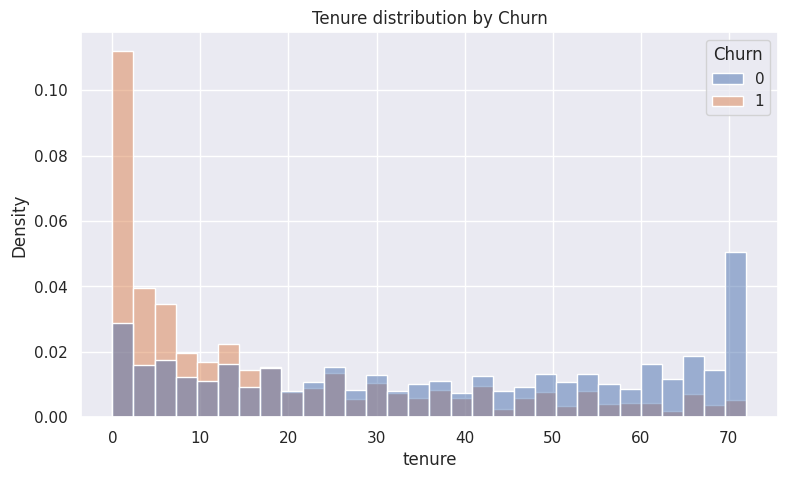

In [160]:
plt.figure(figsize=(9,5))
sns.histplot(data=df,x='tenure',bins=30,hue="Churn",stat="density",common_norm=False)
plt.title('Tenure distribution by Churn')
plt.show()

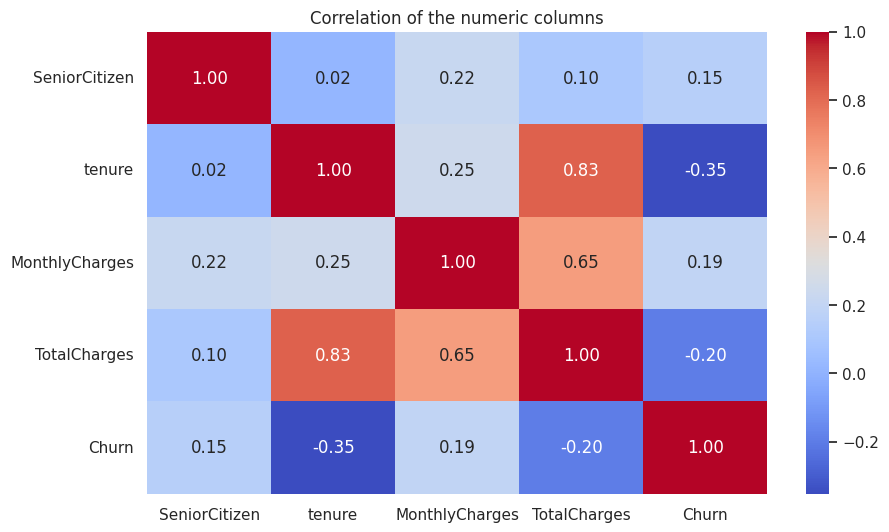

In [161]:
plt.figure(figsize=(10,6))
corr=df[num_cols].corr()
sns.heatmap(corr,annot=True,fmt=".2f",cmap="coolwarm")
plt.title("Correlation of the numeric columns")
plt.show()

## Task 3: Model Training 

In [162]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0


In [163]:
df.tail(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,Male,0,No,No,38,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,0
7034,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,1
7035,Male,0,No,No,19,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.10,0
7036,Female,0,No,No,12,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.30,0
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,0
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1
7042,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,0


In [164]:
#since i want my values first to be yes or no for me to use oneHot encoder
df_encode=df.copy(deep=False)

In [165]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [166]:
#these columns have other values that are not yes or no
replace_columns=['MultipleLines','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','OnlineBackup']
for column in replace_columns:
    df_encode[column]=df_encode[column].replace({'No phone service':'No','No internet service':'No'})

In [167]:
df_encode

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [168]:
#selecting column that have yes and no only as their values
binary_columns=[]
for c in df_encode.columns:
    unique_vals=sorted(df_encode[c].dropna().unique().tolist())
    if unique_vals==['No','Yes']:
        binary_columns.append(c)
    


In [169]:
binary_columns = [c for c in binary_columns if c != 'Churn']


In [170]:
binary_columns

['Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling']

In [171]:
#convert all binary_columns yes to 1 and no to 0
for col in binary_columns:
    df_encode[col]=df_encode[col].map({'Yes':1,'No':0})

In [172]:
#the remainng columns
remaining_cat = [c for c in category_cols if c not in binary_columns]
remaining_cat
remaining_cat = [c for c in df_encode.select_dtypes(include='object').columns if c != 'customerID']
print("Remaining categorical columns:", remaining_cat)

Remaining categorical columns: ['gender', 'InternetService', 'Contract', 'PaymentMethod']


In [173]:
#one hot encoding using pandas
df_model=pd.get_dummies(df_encode,columns=remaining_cat,drop_first=True)

In [174]:
df_model

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,TotalCharges,Churn,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,1,0,0,...,29.85,0,False,False,False,False,False,False,True,False
1,0,0,0,34,1,0,1,0,1,0,...,1889.50,0,True,False,False,True,False,False,False,True
2,0,0,0,2,1,0,1,1,0,0,...,108.15,1,True,False,False,False,False,False,False,True
3,0,0,0,45,0,0,1,0,1,1,...,1840.75,0,True,False,False,True,False,False,False,False
4,0,0,0,2,1,0,0,0,0,0,...,151.65,1,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,1,0,1,1,...,1990.50,0,True,False,False,True,False,False,False,True
7039,0,1,1,72,1,1,0,1,1,0,...,7362.90,0,False,True,False,True,False,True,False,False
7040,0,1,1,11,0,0,1,0,0,0,...,346.45,0,False,False,False,False,False,False,True,False
7041,1,1,0,4,1,1,0,0,0,0,...,306.60,1,True,True,False,False,False,False,False,True


In [175]:
print("Encoded dataset shape:", df_model.shape)
df_model.head()

Encoded dataset shape: (7043, 24)


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,TotalCharges,Churn,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,1,0,0,...,29.85,0,False,False,False,False,False,False,True,False
1,0,0,0,34,1,0,1,0,1,0,...,1889.50,0,True,False,False,True,False,False,False,True
2,0,0,0,2,1,0,1,1,0,0,...,108.15,1,True,False,False,False,False,False,False,True
3,0,0,0,45,0,0,1,0,1,1,...,1840.75,0,True,False,False,True,False,False,False,False
4,0,0,0,2,1,0,0,0,0,0,...,151.65,1,False,True,False,False,False,False,True,False


In [176]:
#Split the dataset into training and test sets. 
from sklearn.model_selection import train_test_split

In [177]:
X=df_model.drop('Churn',axis=1)#used to drop the churn column and select the other columns
y=df_model['Churn']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [178]:
print(X_train.shape)
print(X_test.shape)

(5634, 23)
(1409, 23)


In [179]:
df_model.dtypes

SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
gender_Male                                 bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
Contract_One year                           bool
Contract_Two year   

In [180]:
#scale down the MonthlyCharges and Totalcharges
from sklearn.preprocessing import StandardScaler
num_features=['MonthlyCharges','TotalCharges','tenure']
std=StandardScaler()
X_train[num_features]=std.fit_transform(X_train[num_features])
X_test[num_features]=std.fit_transform(X_test[num_features])

In [184]:
#training  the model using Logistic Regressiond
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)


In [207]:
#training the modek using Support Vector Machine
from sklearn.svm import SVC
svc=SVC(kernel="linear")
svc.fit(X_train,y_train)
svc_pred=svc.predict(X_test)

In [193]:
#training the model using decision_tree
from sklearn.tree import DecisionTreeClassifier
dec_tree=DecisionTreeClassifier()
dec_tree.fit(X_train,y_train)
dec_pred=dec_tree.predict(X_test)

In [200]:
#training the model using random_tree
from sklearn.ensemble import RandomForestClassifier
rand_forest=RandomForestClassifier()
rand_forest.fit(X_train,y_train)
rand_pred=rand_forest.predict(X_test)

# Task 4: Model Evaluation 

In [202]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

In [209]:
# Evaluation of the accuracy score
print("Accuracy score of Logistic Regression:",accuracy_score(y_test,y_pred))
print("Accuracy score of Support Vector Machine:",accuracy_score(y_test,svc_pred))
print("Accuracy score of Decision tree:",accuracy_score(y_test,dec_pred))
print("Accuracy score of Random tree:",accuracy_score(y_test,rand_pred))

Accuracy score of Logistic Regression: 0.8048261178140526
Accuracy score of Support Vector Machine: 0.7934705464868701
Accuracy score of Decision tree: 0.7352732434350603
Accuracy score of Random tree: 0.7927608232789212


The best accuracy is achieved by Logistic Regression (≈ 80.5%).The SVM and Random Forest models are very close behind (≈ 79–79.5%).The Decision Tree performs noticeably worse (≈ 73.5%).
So, the simpler linear model (Logistic Regression) is performing as well or slightly better than the more complex ensemble(Random tree) and kernel-based models(Support Vector Machine) which is interesting and a good sign that the dataset may be linearly separable to a reasonable extent.

In [214]:
#evaluation of the precision_score(TP/(TP+FP))
print("Precision_score of Logistic Regression:", precision_score(y_test, y_pred))
print("Precision_score of Support Vector Machine:", precision_score(y_test, svc_pred))
print("Precision_score of Decision Tree:", precision_score(y_test, dec_pred))
print("Precision_score of Random Forest:", precision_score(y_test, rand_pred))

Precision_score of Logistic Regression: 0.65814696485623
Precision_score of Support Vector Machine: 0.6351791530944625
Precision_score of Decision Tree: 0.5014164305949008
Precision_score of Random Forest: 0.6453900709219859


Precision results indicate that Logistic Regression (0.66) achieves the highest reliability in identifying true churners, followed closely by Random Forest (0.65) and SVM (0.64). The Decision Tree model (0.50) produces many false positives, confirming its weaker performance. Logistic Regression’s strong precision score demonstrates that it is the most dependable model for minimizing incorrect churn predictions and optimizing customer retention efforts

In [216]:
#evaluation of the recall_score(TP/(TP+FN))
print("Recall_score of Logistic Regression:", recall_score(y_test, y_pred))
print("Recall_score of Support Vector Machine:", recall_score(y_test, svc_pred))
print("Recall_score of Decision Tree:", recall_score(y_test, dec_pred))
print("Recall_score of Random Forest:", recall_score(y_test, rand_pred))

Recall_score of Logistic Regression: 0.5508021390374331
Recall_score of Support Vector Machine: 0.5213903743315508
Recall_score of Decision Tree: 0.4732620320855615
Recall_score of Random Forest: 0.48663101604278075


Recall scores indicate that Logistic Regression achieved the best ability to identify actual churners (Recall = 0.55), followed by SVM (0.52), Random Forest (0.49), and Decision Tree (0.47). This means Logistic Regression correctly detects more than half of all customers likely to leave, striking a good balance between capturing churners and maintaining accuracy. In business terms, this model provides the most effective early warning system for customer retention strategies.

In [212]:
#evaluation of the f1_score
print("F1-score of Logistic Regression:", f1_score(y_test, y_pred))
print("F1-score of Support Vector Machine:", f1_score(y_test, svc_pred))
print("F1-score of Decision Tree:", f1_score(y_test, dec_pred))
print("F1-score of Random Forest:", f1_score(y_test, rand_pred))

F1-score of Logistic Regression: 0.5997088791848617
F1-score of Support Vector Machine: 0.5726872246696034
F1-score of Decision Tree: 0.48693259972489683
F1-score of Random Forest: 0.5548780487804879


Among all tested models, Logistic Regression achieved the highest F1-score (0.60), indicating the best balance between precision and recall in identifying churners. The Support Vector Machine (0.57) and Random Forest (0.55) showed comparable but slightly lower performance, while the Decision Tree model performed worst (0.49) due to overfitting. Logistic Regression is therefore recommended as the best-performing and most interpretable model for churn prediction

## Confusion matrix

In [231]:
#import the library
from sklearn.metrics import confusion_matrix

In [232]:
#finding confusion_matrix of logistic regression
confusion_matrix(y_test,y_pred,labels=[1,0])

array([[206, 168],
       [107, 928]])

In the Logistic Regression there are 206 True positives,928 True negatives,168 false negatives and 107 false positives. (TP/TN=1134);(FP/FN=275)

In [221]:
#finding confusion_matrix of support vector machine
confusion_matrix(y_test,svc_pred,labels=[1,0])

array([[195, 179],
       [112, 923]])

In the SVM there are 195 True positives,923 True negatives,179 false negatives and 112 false positives.(TP/TN=1118);(FP/FN=291)

In [222]:
#finding confusion_matrix of decision tree
confusion_matrix(y_test,dec_pred,labels=[1,0])

array([[177, 197],
       [176, 859]])

In the decision tree there are 177 True positives,859 True negatives,197 false negatives and 176 false positives .(TP/TN=1036);(FP/FN=373)

In [223]:
#finding confusion_matrix of random tree
confusion_matrix(y_test,rand_pred,labels=[1,0])

array([[182, 192],
       [100, 935]])

In the random tree there are 182 True positives,935 True negatives,192 false negatives and 100 false positives.(TP/TN=1117);(FP/FN=292)

The confusion matrix results for the four algorithms show that Logistic Regression achieved the best overall performance in predicting customer churn. It produced the highest number of True Positives (correctly identified churners) and True Negatives (correctly identified loyal customers), while maintaining relatively low False Positives and False Negatives.
The Support Vector Machine and Random Forest models also performed reasonably well, though they showed slightly more false negatives, meaning they missed some churners. The Decision Tree model performed the weakest, with a higher number of misclassifications, confirming its tendency to overfit and generalize poorly.

## Classification report

In [226]:
from sklearn.metrics import classification_report

In [230]:
#finding confusion_matrix of CLASSIFICATION REPORTS
print(classification_report(y_test,y_pred,labels=[1,0]))

              precision    recall  f1-score   support

           1       0.66      0.55      0.60       374
           0       0.85      0.90      0.87      1035

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.74      1409
weighted avg       0.80      0.80      0.80      1409



The classification report shows that the Logistic Regression model achieved an overall accuracy of 80% with a churn class F1-score of 0.60. This indicates a good balance between precision (0.66) and recall (0.55) when predicting customer churn. The model correctly identifies over half of actual churners while keeping false positives relatively low.

In [233]:
#finding confusion_matrix of SVM
print(classification_report(y_test,svc_pred,labels=[1,0]))

              precision    recall  f1-score   support

           1       0.64      0.52      0.57       374
           0       0.84      0.89      0.86      1035

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409



The Support Vector Machine achieved an overall accuracy of 79%, with a churn-class precision of 0.64 and recall of 0.52. This indicates that the SVM model correctly identifies about half of the customers likely to churn and makes slightly more false positives compared to Logistic Regression. Although its performance is strong and stable, the Logistic Regression model remains superior with higher precision (0.66), recall (0.55), and F1-score (0.60)

In [234]:
#finding confusion_matrix of decision tree
print(classification_report(y_test,dec_pred,labels=[1,0]))

              precision    recall  f1-score   support

           1       0.50      0.47      0.49       374
           0       0.81      0.83      0.82      1035

    accuracy                           0.74      1409
   macro avg       0.66      0.65      0.65      1409
weighted avg       0.73      0.74      0.73      1409



The Decision Tree classifier achieved an overall accuracy of 74%, with a churn-class precision of 0.50, recall of 0.47, and F1-score of 0.49. These results indicate that the model misclassifies a large number of customers, both by failing to identify true churners and by incorrectly flagging loyal customers. Compared to Logistic Regression and SVM, the Decision Tree model shows weaker performance and lower generalization ability, likely due to overfitting

In [235]:
#finding confusion_matrix of random tree
print(classification_report(y_test,rand_pred,labels=[1,0]))

              precision    recall  f1-score   support

           1       0.65      0.49      0.55       374
           0       0.83      0.90      0.86      1035

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



The Random Forest classifier achieved an overall accuracy of 79%, with a precision of 0.65, recall of 0.49, and F1-score of 0.55 for the churn class. These results indicate that the model correctly predicts the majority of customer outcomes, but its ability to detect actual churners remains moderate. Specifically, the model correctly identifies about half of the customers who actually churn, while maintaining a reasonable level of precision  meaning most of its churn predictions are accurate.

## The best performing model. 

After evaluating four machine learning algorithms : Logistic Regression, Support Vector Machine, Decision Tree, and Random Forest ,the results show that Logistic Regression achieved the best overall performance with an accuracy of 80%, precision of 0.66, recall of 0.55, and F1-score of 0.60.The Random Forest and SVM models followed closely, each achieving around 79% accuracy, but with slightly lower F1-scores and recall values. The Decision Tree model performed the weakest, with a lower accuracy of 74% and F1-score of 0.49, indicating overfitting and poor generalization.
From a business perspective, the Logistic Regression model provides the best trade-off between interpretability and predictive performance. It correctly identifies over half of actual churners and maintains a high level of precision, ensuring that retention efforts are focused on customers who are genuinely at risk of leaving. Therefore, Logistic Regression is recommended as the final model for deployment in the telecom company’s churn prediction system.

# Task 5: Business Insights 

Based on the model analysis and exploratory data findings, the following factors were identified as the most significant contributors to customer churn:
### 1.Contract Type:
Customers on month-to-month contracts are far more likely to churn compared to those with oneor two year contracts.
Short-term contracts offer flexibility, but they also make it easier for customers to switch providers.

### 2.Tenure (Length of Service):
Newer customers (with shorter tenure) tend to leave more often.Loyalty increases with longer relationships, suggesting early customer experience is crucial.

### 3.Monthly Charges:
Customers with higher monthly bills are more likely to churn, especially when the perceived value doesn’t match the cost.

### 4.Internet and Streaming Services:
Those subscribed to fiber optic internet or multiple add-on services (like online security or streaming TV) often experience performance or billing dissatisfaction, leading to higher churn.

### 5.Payment Method:
Customers using electronic check payments show higher churn rates than those using automatic bank or credit card payments, possibly due to payment convenience issues.

### 6.Customer Support and Service Quality:
Negative customer experiences, unresolved complaints, and delayed issue resolution are major churn triggers.

## Strategies to Reduce Customer Loss
To address the above issues, the telecom company can implement the following data-driven retention strategies:
### 1.Introduce Loyalty and Contract Incentives:
Encourage long-term subscriptions by offering discounts, bonus data, or exclusive features for customers who upgrade from month-to-month to yearly contracts.
### 2.Enhance Onboarding and Early Engagement:
Focus on the first three months of service for new customers with welcome offers, personalized support, and check-ins to build loyalty early.

### 3.Flexible Pricing and Value Packages:
Offer customized bundles or loyalty-based discounts for high-bill customers to make pricing feel more fair and personalized.

### 4.Improve Service Quality and Reliability:

Invest in network stability, especially for fiber optic and high-usage plans, to reduce dissatisfaction related to performance.

### 5.Simplify Payment Options:
Promote auto-pay enrollment and reward customers who use more stable payment methods for example credit/debit card or direct debit.

### 6.Proactive Churn Detection and Retention Campaigns:
Use the churn prediction model to identify at risk customers in advance and target them with retention offers, such as service upgrades, discounts, or personalized outreach.

### 7.Customer Feedback Loops:
Regularly collect feedback and track satisfaction scores to quickly address complaints before customers decide to leave.